<a href="https://colab.research.google.com/github/Rukhsar7/nlp_assignment_2_gul/blob/main/Nlp_assignment_2_gul_ucse19007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Gule Rukhsar

---


UCSE19007

---


B.tech 4th year [ 7TH SEM ]

---


Professor : Dr. Sourav Mondal

---


XIM UNIVERSITY

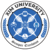

**Step 1 :** Connecting {Mounting} with the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2:** Data Preprocessing - As we are dealing with the text data, we need to pre-process it using word embeddings.

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/nlp/comments.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Step 3:** We only need the text and sentiment column.

In [ ]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In the above result ,we observe that there are more than 14,000 data samples in the sentiment analysis dataset

**Step 4**:Checking the column names.

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Step 5:** We don’t need neutral reviews in our dataset for this binary classification problem. So, we will those rows from the dataset.

In [ ]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


**Step 6:** Checking the values of the airline_sentiment column

In [ ]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

**Step 7:** The labels for this dataset are categorical. Machines understand only numeric data. So, we will convert the categorical values to numeric using the factorize() method. This returns an array of numeric values and an Index of categories.

In [ ]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

As we can observe in the above results, **the 0 here represents positive sentiment and the 1 represents negative sentiment.**

***Note ***: Now, We should transform our text data into something that our machine learning model understands. Basically, we need to convert the text into an array of vector embeddings. Word embeddings are a beautiful way of representing the relationship between the words that are in the text.

To do this, we first give each of the unique words a **unique number** and then replace that word with the number assigned.

**Step 8:** First,we will  retrieve all the text data from the dataset.

In [ ]:
tweet = review_df.text.values

**Step 9:**Now, before proceeding ahead in python sentiment analysis project let’s tokenize all the words in the text with the help of Tokenizer. 


**Note:** In tokenization, we break down all the words/sentences of a text into small parts called tokens.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)


**Step 10:** The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.



In [ ]:
vocab_size = len(tokenizer.word_index) + 1

**Step 11:** Now,we will replace the words with their assigned numbers using the text_to_sequence() method.

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

**Step 12**: Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)




**Step 13:** Dropout is one of the regularization techniques. It is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, a number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model avoiding overfitting.




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

**Step 14:** Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 94s 312ms/step - loss: 0.3961 - accuracy: 0.8338 - val_loss: 0.2140 - val_accuracy: 0.9181
Epoch 2/5
289/289 [==============================] - 75s 259ms/step - loss: 0.2182 - accuracy: 0.9145 - val_loss: 0.1820 - val_accuracy: 0.9350
Epoch 3/5
289/289 [==============================] - 73s 252ms/step - loss: 0.1746 - accuracy: 0.9352 - val_loss: 0.1744 - val_accuracy: 0.9359
Epoch 4/5
289/289 [==============================] - 87s 301ms/step - loss: 0.1371 - accuracy: 0.9489 - val_loss: 0.1718 - val_accuracy: 0.9398
Epoch 5/5
289/289 [==============================] - 84s 291ms/step - loss: 0.1158 - accuracy: 0.9582 - val_loss: 0.2002 - val_accuracy: 0.9337


**Step 15:** Now-Let’s plot these metrics using the matplotlib

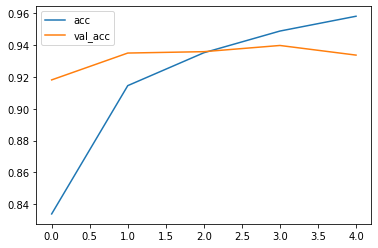

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()

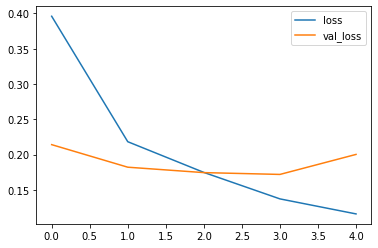

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

**Step 16**: In the final step we will define a function that takes a text as input and outputs its prediction label.

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 404ms/step
Predicted label:  positive
1/1 [==============================] - 0s 41ms/step
Predicted label:  negative


**In the above Sentiment Analysis,done we get our output results.**